# Landfill (LF)

In [86]:
# Import libraries
from swolfpy_processmodels import LF
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)

In [87]:
model = LF()
model.calc()
report=model.report()

## Average collection and oxidation efficiency

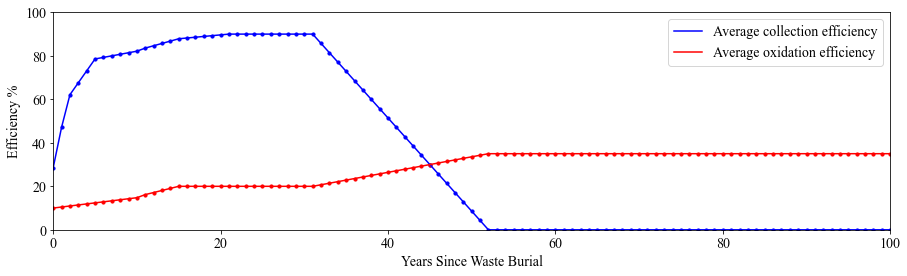

In [88]:
fig, ax=plt.subplots(figsize=(15, 4))

ax.plot(list(range(model.timescale)), model.Average_Collection.values, label='Average collection efficiency', c='b')
ax.scatter(list(range(model.timescale)), model.Average_Collection.values, c='b', s=10)
ax.plot(list(range(model.timescale)), model.Average_Oxidation.values, label='Average oxidation efficiency', c='r')
ax.scatter(list(range(model.timescale)), model.Average_Oxidation.values, c='r', s=10)
ax.set_ylim((0,100))
ax.set_xlim((0,100))
ax.set_ylabel('Efficiency %')
ax.set_xlabel('Years Since Waste Burial')
ax.legend()

## Methane generation

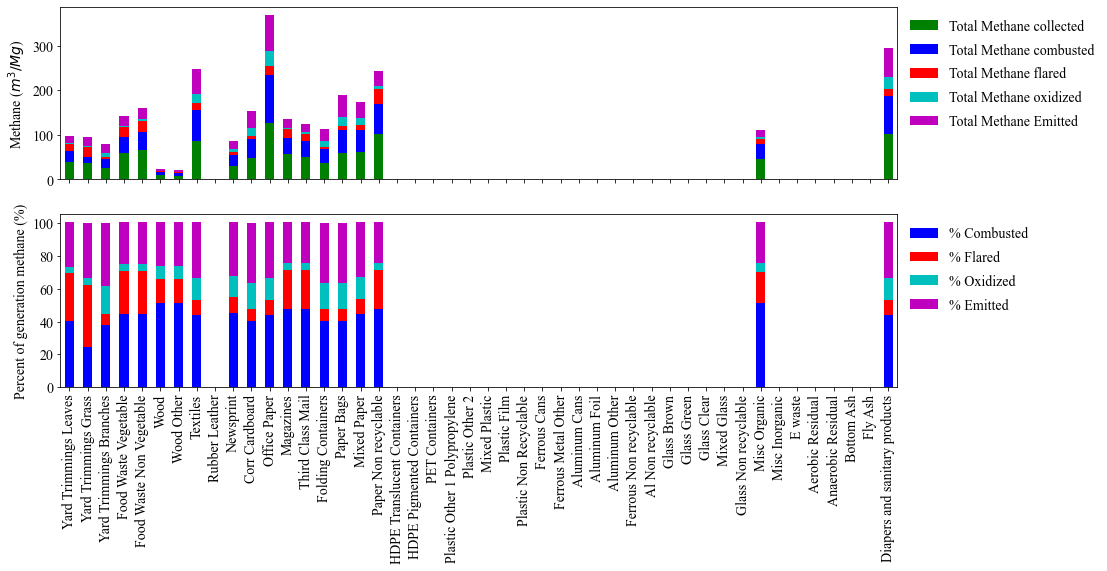

In [92]:
fig, (ax1, ax2)=plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

model.LFG[['Total Methane collected', 'Total Methane combusted', 'Total Methane flared', 
           'Total Methane oxidized','Total Methane Emitted']].plot(kind='bar',
                                                                   stacked=True,
                                                                   ax=ax1,
                                                                   color=['g','b','r','c','m'])

# Create new dataframe for LFG
LFG = pd.DataFrame(index=model.Index)
# Normalizing the LFG based on the generated Methane
LFG['% Combusted'] = model.LFG['Total Methane combusted'].values / model.LFG['Total generated Methane'].values * 100
LFG['% Flared'] = model.LFG['Total Methane flared'].values / model.LFG['Total generated Methane'].values * 100
LFG['% Oxidized'] = model.LFG['Total Methane oxidized'].values / model.LFG['Total generated Methane'].values * 100
LFG['% Emitted'] = model.LFG['Total Methane Emitted'].values / model.LFG['Total generated Methane'].values * 100

LFG.plot(kind='bar', stacked=True, ax=ax2, color=['b','r','c','m'])

ax1.set_ylabel('Methane ($m^3/Mg$)')
ax2.set_ylabel('Percent of generation methane (%)')
ticks=ax1.set_xticklabels([])
ticks=ax2.set_xticklabels([x.replace('_',' ') for x in model.Index], rotation=90)
legend = ax1.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')
legend = ax2.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')